In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [90]:
import re
import math

In [164]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [572]:
fifa = pd.read_csv("FIFA19data.csv", sep=r'\s*,\s*', engine='python')
#fifa.head()
#18207 rows * 50 columns, no null

In [573]:

fifa['Value_unit'] = fifa['Value'].copy()
fifa['Value'] = fifa['Value'].apply(lambda x:float((str(re.findall(r'(\d+\.*\d*)',str(x))).strip("['']"))))
fifa['Value_unit'] = fifa['Value_unit'].apply(lambda x:str(re.findall(r'[A-Z]',str(x))).strip("['']"))

fifa['Wage_unit'] = fifa['Wage'].copy()
fifa['Wage'] = fifa['Wage'].apply(lambda x:float(str(re.findall(r'(\d+\.*\d*)',str(x))).strip("['']")))
fifa['Wage_unit'] = fifa['Wage_unit'].apply(lambda x:str(re.findall(r'[A-Z]',str(x))).strip("['']"))

fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_unit,Wage_unit
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,M,K
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,M,K
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,M,K
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,M,K
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355.0,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,M,K


In [574]:
fifa['Value']=np.where(fifa['Value_unit'] =='M', fifa['Value']*1000, fifa['Value'])
#fifa['Value']=np.where(fifa['Value_unit'] =='K', fifa['Value']*1000, fifa['Value'])
#fifa['Wage']=np.where(fifa['Wage_unit'] =='K', fifa['Wage']*1000, fifa['Wage'])
#fifa['GK_level']=np.where(fifa['GKDiving'] <=40, 'low', 'high')

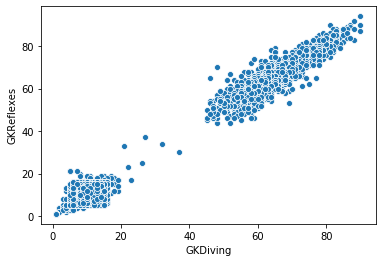

In [575]:
sns.scatterplot(x=fifa['GKDiving'],y=fifa['GKReflexes'])

In [576]:
fifa['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', '30-Jun-19',
       '2025', '2026', '31-Dec-18', '2018', nan, '31-May-20', '30-Jun-20',
       '31-May-19', '31-Dec-19', '1-Jan-19', '1-Jun-19', '4-Jan-19',
       '31-Jan-19', '7-Jan-19', '2-Jan-19', '6-Jan-19', '14-Oct-19',
       '3-Jan-19', '4-May-19', '12-Jan-19', '25-Jan-19', '18-Jan-19',
       '1-Dec-19', '30-Nov-18', '27-Feb-20', '5-Jan-19', '15-Jan-19',
       '30-Jan-19', '11-Jan-19', '20-Jan-19'], dtype=object)

In [577]:
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='20-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='11-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='30-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='15-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='5-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='3-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='30-Jun-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='27-Feb-20', '2019', fifa['Contract Valid Until'])

fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='30-Nov-18', '2018', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='1-Dec-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='18-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='25-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='12-Jan-19', '2019', fifa['Contract Valid Until'])

fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='4-May-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='14-Oct-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='6-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='2-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='7-Jan-19', '2019', fifa['Contract Valid Until'])

fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='31-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='4-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='1-Jun-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='1-Jan-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='31-Dec-19', '2019', fifa['Contract Valid Until'])

fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='31-May-19', '2019', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='30-Jun-20', '2020', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='31-May-20', '2020', fifa['Contract Valid Until'])
fifa['Contract Valid Until']=np.where(fifa['Contract Valid Until'] =='31-Dec-18', '2018', fifa['Contract Valid Until'])

In [578]:
fifa = fifa.drop('ID', 1)
fifa = fifa.drop('Name', 1)
fifa = fifa.drop('Nationality', 1)
fifa = fifa.drop('Club', 1)
#fifa = fifa.drop('Value', 1)
#fifa = fifa.drop('Wage', 1)
fifa = fifa.drop('Body Type', 1)
fifa = fifa.drop('Potential', 1)
fifa = fifa.drop('Value_unit', 1)
fifa = fifa.drop('Wage_unit', 1)
# fifa = fifa.drop('GKPositioning', 1)
# fifa = fifa.drop('GKDiving', 1)
# fifa = fifa.drop('GKKicking', 1)
# fifa = fifa.drop('GKHandling', 1)
# fifa = fifa.drop('GKReflexes', 1)
fifa = fifa.dropna()

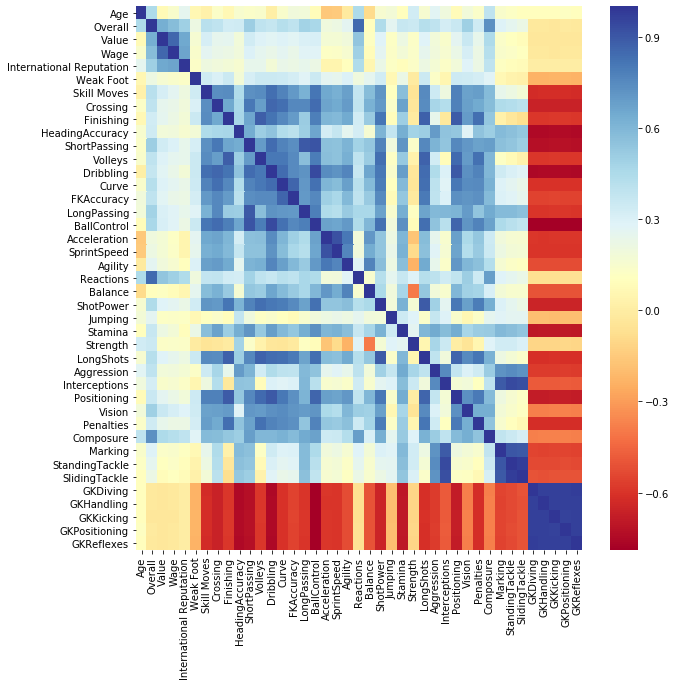

In [579]:
corr_mat=fifa.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_mat,ax=ax,cmap='RdYlBu')

In [580]:
for col in fifa.columns:
    fifa[col].fillna(value=fifa[col].mode()[0], inplace=True)

factors = ['International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Contract Valid Until','Wage']

for var in factors:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(fifa[var], prefix=var)
    fifa = pd.concat([fifa,cat_list], axis = 1)
    fifa = fifa.drop(var, 1)

In [549]:
fifa.columns.to_list()

['Overall',
 'Wage',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'International Reputation_1.0',
 'International Reputation_2.0',
 'International Reputation_3.0',
 'International Reputation_4.0',
 'International Reputation_5.0',
 'Weak Foot_1.0',
 'Weak Foot_2.0',
 'Weak Foot_3.0',
 'Weak Foot_4.0',
 'Weak Foot_5.0',
 'Skill Moves_1.0',
 'Skill Moves_2.0',
 'Skill Moves_3.0',
 'Skill Moves_4.0',
 'Skill Moves_5.0',
 'Work Rate_High/ High',
 'Work Rate_High/ Low',
 'Work Rate_High/ Medium',
 'Work Rate_Low/ High',
 'Work Rate_Low/ Low',
 'Work

In [581]:
X = fifa.copy()
X = X.drop('Overall', 1)
Y = fifa.copy()
Y = Y['Overall']

In [582]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.9, random_state=31)

# Basic Linear Model

In [583]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
lm1_predictions = lm1.predict(X_test)
lm1_r2 = r2_score(y_test,lm1_predictions)
lm1_r2_adj = 1 - (1-lm1_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R square: ',lm1_r2)
print('Adj. R square: ',lm1_r2_adj)
print('Features used: ',len(X_test.columns.tolist()))

R square:  0.8949859198063498
Adj. R square:  0.8934061146092527
Features used:  239


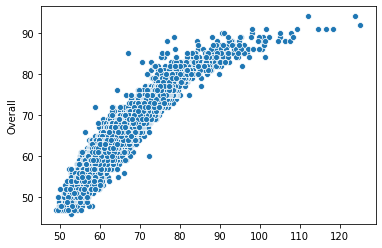

In [584]:
sns.scatterplot(lm1_predictions,y_test)

# CrossVal

In [585]:
cv_predictions = cross_val_predict(lm1, X, Y, cv=5)
cv_r2 = r2_score(Y,cv_predictions)
#cv_predictions = cross_val_predict(lm1, X_test, y_test, cv=5)
#cv_r2 = r2_score(y_test,cv_predictions)
print(cv_r2)

-1.2490592308055102


# Lasso

In [586]:
scaler=StandardScaler()
X_test=scaler.fit_transform(X_test)
#scaler = RobustScaler()
X_train=scaler.fit_transform(X_train)
#X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.9, random_state=31)

In [587]:
#scaler=StandardScaler()
#X=scaler.fit_transform(X_train)
lasso = Lasso(normalize=False)
lasso.fit(X_train,y_train)
lasso1_predictions = lasso.predict(X_test)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
r2_lasso1 = r2_score(y_test, lasso1_predictions)
lasso1_r2_adj = 1 - (1-r2_lasso1)*(len(y_test)-1)/(len(y_test)-coeff_used-1)

In [588]:
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)
print("test r2 score: ", r2_lasso1)
print('test r2 adj score: ', lasso1_r2_adj)

training score: 0.7901448410778036
test score:  0.7856114630806835
number of features used:  6
test r2 score:  0.7856114630806834
test r2 adj score:  0.785531665858505


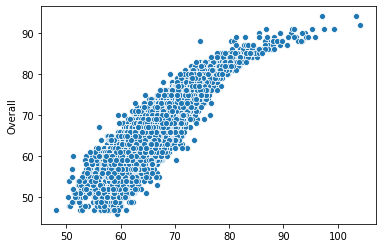

In [589]:
sns.scatterplot(lasso1_predictions,y_test)

In [590]:
#If you are interested in checking adjusted R2
# lm_train_score=lm1.score(X_train,y_train)
# lm_test_score=lm1.score(X_test,y_test)
# print("training score:", lm_train_score)
# print("test score: ", lm_test_score)

# lm_ra = 1-(1-lm_train_score)*((len(X_train)-1)/(len(X_train)-len(lm1.coef_)-1))
# print(lm_ra)
# print(lm_train_score)

# lasso_ra = 1-(1-train_score)*((len(X_train)-1)/(len(X_train)-coeff_used-1))
# print(lasso_ra)
# print(train_score)

In [591]:
lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,2e-2,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)

lasso_regressor.fit(X_train, y_train)

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2292.543443448702, tolerance: 6.950806703910613
  positive)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419.548310731432, tolerance: 7.153939009071877
  positive)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2454.3450521427303, tolerance: 7.037239357990231
  positive)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase th

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.02,
                                   0.01, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [592]:
lasso_regressor.best_params_

{'alpha': 0.02}

In [593]:
#lasso_regressor.score(X_train,y_train)
lasso_best = Lasso(normalize=False,alpha=0.02)
lasso_best.fit(X_train,y_train)
lasso2_predictions = lasso_best.predict(X_test)
train_score=lasso_best.score(X_train,y_train)
test_score=lasso_best.score(X_test,y_test)
coeff_used = np.sum(lasso_best.coef_!=0)
r2_lasso2 = r2_score(y_test, lasso2_predictions)
lasso2_r2_adj = 1 - (1-r2_lasso2)*(len(y_test)-1)/(len(y_test)-coeff_used-1)

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)
print("test r2 score: ", r2_lasso2)
print('test r2 adj score: ', lasso2_r2_adj)

training score: 0.9269477688171893
test score:  0.9035530826772601
number of features used:  127
test r2 score:  0.9035530826772602
test r2 adj score:  0.9027874874213074


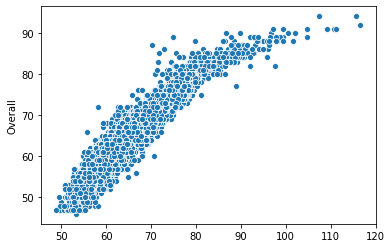

In [594]:
sns.scatterplot(lasso2_predictions,y_test)

In [595]:
#Rigde Penality
lasso_best = Ridge(alpha=1)
lasso_best.fit(X_train,y_train)
lasso2_predictions = lasso_best.predict(X_test)
train_score=lasso_best.score(X_train,y_train)
test_score=lasso_best.score(X_test,y_test)
coeff_used = np.sum(lasso_best.coef_!=0)
r2_lasso2 = r2_score(y_test, lasso2_predictions)
lasso2_r2_adj = 1 - (1-r2_lasso2)*(len(y_test)-1)/(len(y_test)-coeff_used-1)

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)
print("test r2 score: ", r2_lasso2)
print('test r2 adj score: ', lasso2_r2_adj)

training score: 0.9294561944331509
test score:  0.8952312456972494
number of features used:  188
test r2 score:  0.8952312456972494
test r2 adj score:  0.8939954240252129


In [404]:
# coeff_used = np.sum(lasso_regressor.best_estimator_.coef_!=0)
# print(coeff_used)

In [178]:
# lasso2_predictions = lasso_regressor.predict(X_test)

# AIC BIC

In [179]:
def AIC(y_true, y_hat, coeff_used):
    resid = y_true - y_hat
    sse = sum(resid**2)
    n = len(y_hat)
    return n*np.log(sse/n) + 2*coeff_used

def BIC(y_true, y_hat, coeff_used):
    resid = y_true - y_hat
    sse = sum(resid**2)
    n = len(y_hat)
    return n*np.log(sse/n) + np.log(n)*coeff_used

In [180]:
#aic and bic of simple linear model
aic_lm1 = AIC(y_test, lm1_predictions, (len(X_test.columns)+1))
print(aic_lm1)
bic_lm1 = BIC(y_test, lm1_predictions, (len(X_test.columns)+1))
print(bic_lm1)

27300.326786055277
28247.948750890464


In [181]:
#aic and bic of lasso model
aic_lasso2 = AIC(y_test, lasso2_predictions, (coeff_used+1))
print(aic_lasso2)
bic_lasso2 = BIC(y_test, lasso2_predictions, (coeff_used+1))
print(bic_lasso2)

27274.691985757767
27736.94660275054
